# Zadanie 1

Zamiana ODE $n$-tego rzędu na równania pierwszego rzędu.

## $y''=y'-y^2y'-y$

Niech 
$$y_1(t)=y$$
$$y_2(t)=y'$$
wtedy
$$
\begin{bmatrix}
y_1'\\
y_2'
\end{bmatrix}
=
\begin{bmatrix}
y_2\\
y_2-y_1^2y_2-y_1
\end{bmatrix}
$$

## $y'''=-yy''$

Niech  
$$y_1(t)=y$$  
$$y_2(t)=y'$$  
$$y_3(t)=y''$$
wtedy
$$
\begin{bmatrix}
y_1'\\
y_2'\\
y_3'
\end{bmatrix}
=
\begin{bmatrix}
y_2\\
y_3\\
-y_1y_3
\end{bmatrix}
$$

## Układ 3

Niech
$$y_a=y_1$$
$$y_b=y_1'$$
$$y_c=y_2$$
$$y_d=y_2'$$
wtedy
$$
\begin{bmatrix}
y_a'\\
y_b'\\
y_c'\\
y_d'\\
\end{bmatrix}
=
\begin{bmatrix}
y_b\\
-GMy_a\left(y_a^2+y_c^2\right)^{3/2}\\
y_d\\
-GMy_c\left(y_a^2+y_c^2\right)^{3/2}
\end{bmatrix}
$$

# Zadanie 2

In [1]:
def explicit_euler_step(t0, y0, h):
    y = y0 + h * (-5 * y0)
    t = t0 + h
    
    return t, y

Równanie
$$y'=-5y$$
ma rozwiązanie ogólne w postaci
$$y=ce^{-5t}$$
Rozwiązaniem szczególnym dla $t_0=0$ i $y_0=1$ jest
$$y=e^{-5t}$$

## Analityczna stabilność

Niech
$$y=c_1e^{-5t}$$
oraz
$$\hat{y}=c_2e^{-5t}$$
wtedy
$$||y-\hat{y}||=||(c_1-c_2)e^{-5t}||\rightarrow0$$
więc rozwiązanie jest asymptotycznie stabilne, zatem jest stabilne.

## Numeryczna stabilność

Jeśli równanie jest postaci
$$y'=\lambda{y}$$
to jest stabilne jeśli
$$|1+\lambda{h}| < 1$$
W naszym wypadku $\lambda=-5$, natomiast $h=0.5$


Równanie nie jest stabilne, ponieważ
$$|1-5\cdot0.5|=|1-2.5|=|-1.5|>1$$

## Przybliżenie jawną metodą Eulera

In [2]:
y0 = 1
t0 = 0
h = 0.5
n = 1
t, y = explicit_euler_step(t0, y0, h)
print(f"For t = 0.5, approximation by Euler method is y = {y}")

For t = 0.5, approximation by Euler method is y = -1.5


In [3]:
y_real = 0.082
relative_err = (abs(y - y_real) / y_real) * 100
print(f"Relative error of explicit Euler method is {round(relative_err)}%")

Relative error of explicit Euler method is 1929%


Przybliżone rozwiązanie wynosi $y=-1.5$. Przy realnym rozwiązaniu równym $y^*\approx0.082$ błąd względny wynosi $E\approx1929\%$

## Stabilnośc numeryczna niejawnej metody Eulera

Jeśli równanie jest postaci
$$y'=\lambda{y}$$
to jest stabilne jeśli
$$\left|\frac{1}{1-\lambda{h}}\right| < 1$$
W naszym wypadku $\lambda=-5$, natomiast $h=0.5$


Rozwiązanie jest stabilne ponieważ
$$\left|\frac{1}{1+2.5}\right|=\left|\frac{1}{3.5}\right|<1$$

## Przybliżenie niejawną metodą Eulera

In [4]:
def implicit_euler_step(t0, y0, h):
    y1 = y0 / (1 + 5*h)
    
    return t0+h, y1

In [5]:
y0 = 1
t0 = 0
h = 0.5
t, y = implicit_euler_step(t0, y0, h)
print(f"For t = 0.5, approximation by implicit Euler method is y = {y}")

For t = 0.5, approximation by implicit Euler method is y = 0.2857142857142857


In [6]:
relative_err = (abs(y_real - y) / y_real) * 100
print(f"Relative error for implicit Euler method is {round(relative_err, 1)}%")

Relative error for implicit Euler method is 248.4%


Wynik dla niejawnej metody Eulera $y\approx0.286$. Błąd względny $E\approx248.5\%$

# Zadanie 3

$$
\begin{cases}
S'=-\beta{I}S\\
I'=\beta{I}S-\gamma{I}\\
R'=\gamma{I}
\end{cases}
$$

Należy rozwiązać powyższy układ równań od $t_0=0$ do $t_k=14$ z krokiem $h=0.2$, dla wartości początkowych
$$
\begin{cases}
S(t_0)=762\\
I(t_0)=1\\
R(t_0)=0
\end{cases}
$$
Z parametrami początkowymi $\beta=1$ i $\gamma=\frac{1}{7}$

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo

In [8]:
t0 = 0
h = 0.2
S0 = 762
I0 = 1
R0 = 0
beta = 1
gamma = 1/7
N = 763

## Jawna metoda Eulera

In [9]:
def explicit_euler(S0, I0, R0, h, beta, gamma):
    global N
    Ss = []
    Is = []
    Rs = []
    Ss.append(S0)
    Is.append(I0)
    Rs.append(R0)
    
    for k in range(70):
        S_k = Ss[-1] + h * ((-beta/N) * Is[-1] * Ss[-1])
        I_k = Is[-1] + h * ((beta/N) * Is[-1] * Ss[-1] - gamma * Is[-1])
        R_k = Rs[-1] + h * (gamma * Is[-1])
        Ss.append(S_k)
        Rs.append(R_k)
        Is.append(I_k)

    return np.array(Ss), np.array(Is), np.array(Rs)    

In [10]:
t = np.arange(start = 0, stop=14.02, step=0.2)

In [11]:
S_exp, I_exp, R_exp = explicit_euler(S0, I0, R0, h, beta, gamma)

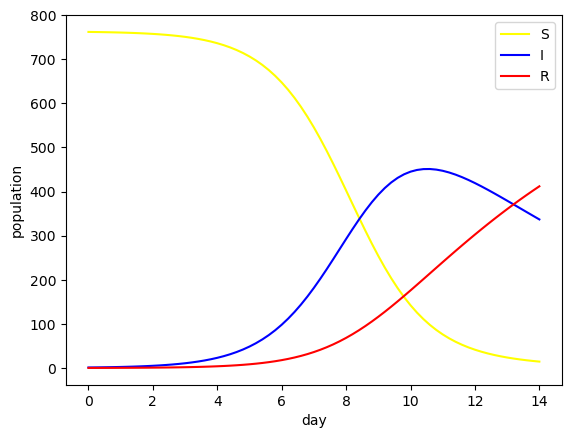

In [12]:
plt.plot(t, S_exp, label="S", color="yellow")
plt.plot(t, I_exp, label="I", color="blue")
plt.plot(t, R_exp, label="R", color="red")
plt.xlabel("day")
plt.ylabel("population")
plt.legend()
plt.show()

**Wyk. 1** - układ równań rozwiązany jawną metodą Eulera

In [13]:
const_counter = S_exp + I_exp + R_exp

## Niejawna metoda Eulera

$$
\begin{cases}
S_{n+1}=S_n+h\left(-\beta{I_{n+1}}S_{n+1}\right)\\
I_{n+1}=I_n+h\left(\beta{I_{n+1}}S_{n+1}-\gamma{I_{n+1}}\right)\\
R_{n+1}=R_n+h\left(\gamma{I_{n+1}}\right)
\end{cases}
$$

$$
\begin{cases}
S_n-S_{n+1}+h\left(-\beta{I_{n+1}}S_{n+1}\right)=0\\
I_n-I_{n+1}+h\left(\beta{I_{n+1}}S_{n+1}-\gamma{I_{n+1}}\right)=0\\
R_n-R_{n+1}+h\left(\gamma{I_{n+1}}\right)=0
\end{cases}
$$

$$
\begin{cases}
S_n-S_{n+1}-h\beta{I_{n+1}}S_{n+1}=0\\
I_n-I_{n+1}+h\beta{I_{n+1}}S_{n+1}-h\gamma{I_{n+1}}=0\\
R_n-R_{n+1}+h\gamma{I_{n+1}}=0
\end{cases}
$$

In [14]:
def calc_func(Sk, Ik, Rk, h, beta, gamma):
    # S_k+1 = x[0], I_k+1 = x[1], R_k+1 = x[2]
    def func(x):
        res = [
            Sk - x[0] - h * (beta/N) * x[1] * x[0],
            Ik - x[1] + h * (beta/N) * x[1] * x[0] - h * gamma * x[1],
            Rk - x[2] + h * gamma * x[1]
        ]
        return res
    
    return func

def implicit_euler(S0, I0, R0, h, beta, gamma):
    Ss = []
    Is = []
    Rs = []
    Ss.append(S0)
    Is.append(I0)
    Rs.append(R0)

    # Function generalized so it can be used in task 4
    iterations = len(np.arange(start=0, stop=14+h, step=h)) - 1
    
    for k in range(iterations):
        func = calc_func(Ss[-1], Is[-1], Rs[-1], h, beta, gamma)
        S, I, R = spo.fsolve(func, (Ss[-1], Is[-1], Rs[-1]))
        Ss.append(S)
        Is.append(I)
        Rs.append(R)

    return np.array(Ss), np.array(Is), np.array(Rs)

In [15]:
S_imp, I_imp, R_imp = implicit_euler(S0, I0, R0, h, beta, gamma)

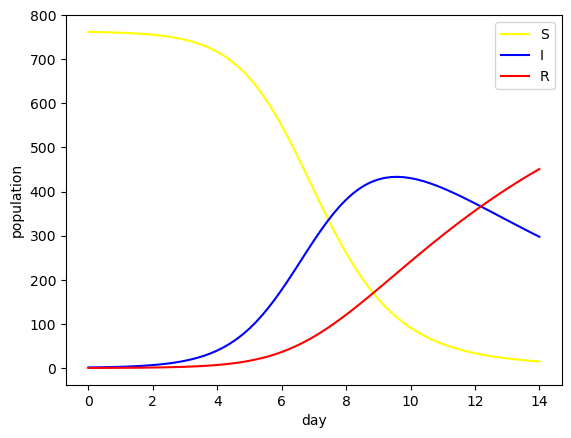

In [16]:
plt.plot(t, S_imp, label="S", color="yellow")
plt.plot(t, I_imp, label="I", color="blue")
plt.plot(t, R_imp, label="R", color="red")
plt.xlabel("day")
plt.ylabel("population")
plt.legend()
plt.show()

**Wyk. 2** - układ rozwiązany niejawną metodą Eulera

## Metoda Rungego-Kutty 4 rzędu

In [17]:
def RK4(S0, I0, R0):
    global h, beta, gamma, N

    Ss = [S0]
    Is = [I0]
    Rs = [R0]

    for i in range(70):
        kS1 = (-beta/N) * Is[-1] * Ss[-1]
        kI1 = (beta/N) * Is[-1] * Ss[-1] - gamma * Is[-1]
        kR1 = gamma * Is[-1]
        
        kS2 = (-beta/N) * (Is[-1] + 0.5 * h * kI1) * (Ss[-1] + 0.5 * h * kS1)
        kI2 = (beta/N) * (Is[-1] + 0.5 * h * kI1) * (Ss[-1] + 0.5 * h * kS1) - gamma * (Is[-1] + 0.5 * h * kI1)
        kR2 = gamma * (Is[-1] + 0.5 * h * kI1)
        
        kS3 = (-beta/N) * (Is[-1] + 0.5 * h * kI2) * (Ss[-1] + 0.5 * h * kS2)
        kI3 = (beta/N) * (Is[-1] + 0.5 * h * kI2) * (Ss[-1] + 0.5 * h * kS2) - gamma * (Is[-1] + 0.5 * h * kI2)
        kR3 = gamma * (Is[-1] + 0.5 * h * kI2)
        
        kS4 = (-beta/N) * (Is[-1] + h * kI3) * (Ss[-1] + h * kS3)
        kI4 = (beta/N) * (Is[-1] + h * kI3) * (Ss[-1] + h * kS3) - gamma * (Is[-1] + h * kI3)
        kR4 = gamma * (Is[-1] + h * kI3)

        S = Ss[-1] + (h/6) * (kS1 + 2*kS2 + 2*kS3 + kS4)
        I = Is[-1] + (h/6) * (kI1 + 2*kI2 + 2*kI3 + kI4)
        R = Rs[-1] + (h/6) * (kR1 + 2*kR2 + 2*kR3 + kR4)

        Ss.append(S)
        Is.append(I)
        Rs.append(R)


    return np.array(Ss), np.array(Is), np.array(Rs)

In [18]:
S_rk, I_rk, R_rk = RK4(S0, I0, R0)

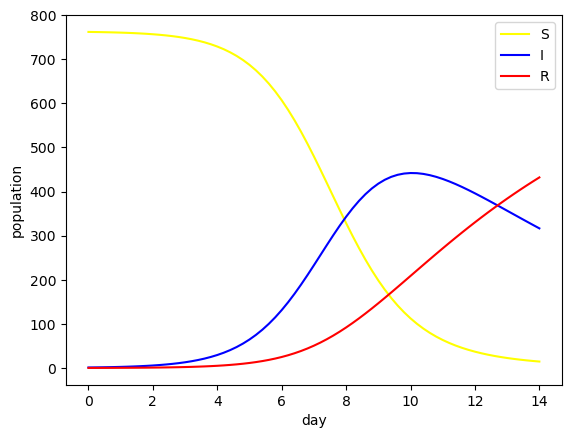

In [19]:
plt.plot(t, S_rk, label="S", color="yellow")
plt.plot(t, I_rk, label="I", color="blue")
plt.plot(t, R_rk, label="R", color="red")
plt.xlabel("day")
plt.ylabel("population")
plt.legend()
plt.show()

**Wyk. 3** - układ rozwiązany metodą RK4

## Wspólny wykres stałej populacji

In [20]:
exp = S_exp + I_exp + R_exp
imp = S_imp + I_imp + R_imp
rk = S_rk + I_rk + R_rk
len(imp)

71

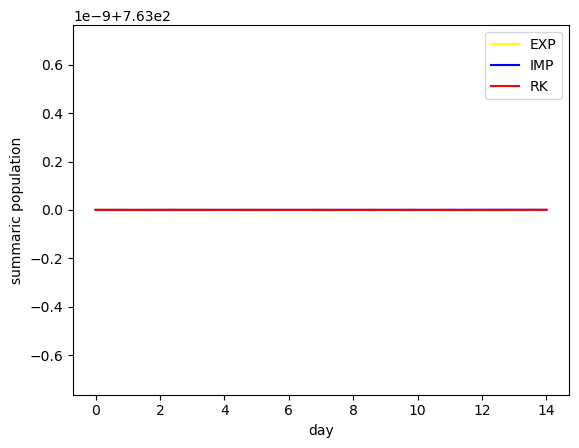

In [21]:
plt.plot(t, exp, label="EXP", color="yellow")
plt.plot(t, imp, label="IMP", color="blue")
plt.plot(t, rk, label="RK", color="red")
plt.xlabel("day")
plt.ylabel("summaric population")
plt.legend()
plt.show()

**Wyk. 4** - $N(t)+I(t)+R(t)$ dla trzech metod

# Zadanie 4

In [22]:
days = np.linspace(start = 0, stop = 14, num = 15)
infected = np.array([1, 3, 6, 25, 73, 222, 294, 258, 237, 191, 125, 69, 27, 11, 4])

## Funkcja 1

In [23]:
def rss(theta, h, S0, I0, R0):
    global infected
    beta, gamma = theta
    _, infected_calc, _ = implicit_euler(S0, I0, R0, h, beta, gamma)
    return np.sum((infected - infected_calc)**2)

In [24]:
%%capture
theta_guess = (beta, gamma)
res = spo.minimize(rss, theta_guess, args=(1, S0, I0, R0), method = "Nelder-Mead")
beta_calc = res.x[0]
gamma_calc = res.x[1]
print(f"Estimated beta = {beta_calc}, estimated gamma = {gamma_calc}")
print(f"Reproduction rate: {beta_calc/gamma_calc}")

Obliczone wartości parametrów wynoszą $\beta\approx1.212$, $\gamma\approx0.374$.  
Współczynnik reprodukcji $R_0=\frac{\beta}{\gamma}\approx3.239$

## Funkcja 2

In [25]:
def ll(theta, h, S0, I0, R0):
    global infected
    beta, gamma = theta
    _, infected_calc, _ = implicit_euler(S0, I0, R0, h, beta, gamma)
    return -np.sum(infected * np.log(infected_calc)) + np.sum(infected_calc)

In [26]:
theta_guess = (beta, gamma)
res = spo.minimize(ll, theta_guess, args=(1, S0, I0, R0), method = "Nelder-Mead")
beta_calc = res.x[0]
gamma_calc = res.x[1]
print(f"Estimated beta = {beta_calc}, estimated gamma = {gamma_calc}")
print(f"Reproduction rate: {beta_calc/gamma_calc}")

Estimated beta = 1.2492457208752223, estimated gamma = 0.42846048654358776
Reproduction rate: 2.915661443959396


Obliczone wartości parametrów wynoszą $\beta\approx1.249$, $\gamma\approx0.428$.  
Współczynnik reprodukcji $R_0=\frac{\beta}{\gamma}\approx2.916$